In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Read Data

In [9]:
df = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\src\\data\\Reddit_MentalHealth_250.csv")
df.head()

,id,title,author,author_id,author_karma,author_flair,upvotes,score,upvote_ratio,post_ts,...,comments,nsfw,self_text,spoiler,stickied,subreddit,subreddit_id,subreddit_subs,url,category
0,18qa8qj,I’m depressed and anxious this Christmas,mrsunsfan,8kdawssf,320425.0,NaN,0,0,0.49,1.703474e+09,...,29,False,I’ve been struggling since my ex broke up with...,False,False,Anxiety,2qmij,661128,https://www.reddit.com/r/Anxiety/comments/18qa...,Controversial
1,120xdga,Today i was at a neurologist and i told him th...,useralreadyused,g3wz23b7,144.0,NaN,0,0,0.49,1.679690e+09,...,85,False,NaN,False,False,Anxiety,2qmij,661128,https://www.reddit.com/r/Anxiety/comments/120x...,Controversial
2,1902yq0,Do you watch porn?,Admirable_Strike4114,cpd2lm0x,1836.0,NaN,3,3,0.54,1.704557e+09,...,22,False,Pornography is the worst factor that aggravate...,False,False,Anxiety,2qmij,661128,https://www.reddit.com/r/Anxiety/comments/1902...,Controversial
3,roksot,Welp guess I’ll die a virgin,ThrowawayT0,NaN,-inf,NaN,1,1,0.52,1.640478e+09,...,52,False,\nLady who I thought was flirting well... she ...,False,False,Anxiety,2qmij,661128,https://www.reddit.com/r/Anxiety/comments/roks...,Controversial
4,2kvv6z,[Rant] So today I saw a guy in town dressed a ...,tumblingturtle,in9cu,15.0,NaN,2,2,0.52,1.414764e+09,...,17,False,"So there I was walking through town, noticed s...",False,False,Anxiety,2qmij,661128,https://www.reddit.com/r/Anxiety/comments/2kvv...,Controversial


In [10]:
# Drop Duplicates
df_no_dups = df.drop_duplicates()

In [11]:
df = df[df['subreddit'] != 'selfimprovement'].reset_index(drop=True)

In [12]:
i = 999
df[['subreddit', 'subreddit_subs']].iloc[[i, i + 1000, i + 1000*2, i + 1000*3, 
                                          i + 1000*4, i + 1000*5, i + 1000*6, 
                                          i + 1000*7, i + 1000*8, i + 1000*9]]

,subreddit,subreddit_subs
999,Anxiety,661109
1999,AnxietyDepression,55678
2999,depression,1007636
3999,depression_help,93515
4999,mentalhealth,443558
5999,MentalHealthSupport,41518
6999,mentalillness,149332
7999,ptsd,100210
8999,selfhelp,172414
9999,socialanxiety,401691


In [13]:
df['edited'] = np.where(df['edited'] == 'False', False, True)
df[['edited']].groupby(by = ['edited']).value_counts()

edited
False    9085
True      915
dtype: int64

In [14]:
df.isna().sum()

id                   0
title                0
author             784
author_id         1134
author_karma         0
author_flair      9958
upvotes              0
score                0
upvote_ratio         0
post_ts              0
distinguished     9989
edited               0
original             0
self                 0
locked               0
name                 0
comments             0
nsfw                 0
self_text         1352
spoiler              0
stickied             0
subreddit            0
subreddit_id         0
subreddit_subs       0
url                  0
category             0
dtype: int64

In [15]:
df.drop(['author_flair', 'author', 'author_id', 'id', 'distinguished', 'name', 'subreddit_id'], axis = 1, inplace = True)

### Time analysis

In [16]:
df['post_ts'] = pd.to_datetime(df['post_ts'], unit = 's')

In [17]:
df['post_year'] = df['post_ts'].apply(lambda t : t.year)
df['post_year'].value_counts()

2024    4610
2020    1214
2023    1133
2021     779
2022     668
2019     652
2018     305
2016     121
2013     109
2014     103
2012      99
2017      99
2015      78
2011      22
2009       6
2010       2
Name: post_year, dtype: int64

In [18]:
df['post_month'] = df['post_ts'].apply(lambda t : t.month)
df['post_month'].value_counts()

2     4381
1     1001
3      926
6      437
12     435
5      427
11     423
7      416
8      410
10     400
4      373
9      371
Name: post_month, dtype: int64

In [19]:
df.drop(['post_ts'], axis = 1, inplace = True)

### Karma span

In [20]:
df['author_karma'] = df['author_karma'].apply(lambda k : pd.NA if k == float('-inf') else k)

In [21]:
min(df[~pd.isna(df['author_karma'])]['author_karma'])

-100.0

In [22]:
max(df[~pd.isna(df['author_karma'])]['author_karma'])

769451.0

In [23]:
karma_count = df[~pd.isna(df['author_karma'])]['author_karma'].value_counts().reset_index()

C:\Users\joana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6833'. Pick better value with 'binwidth'.


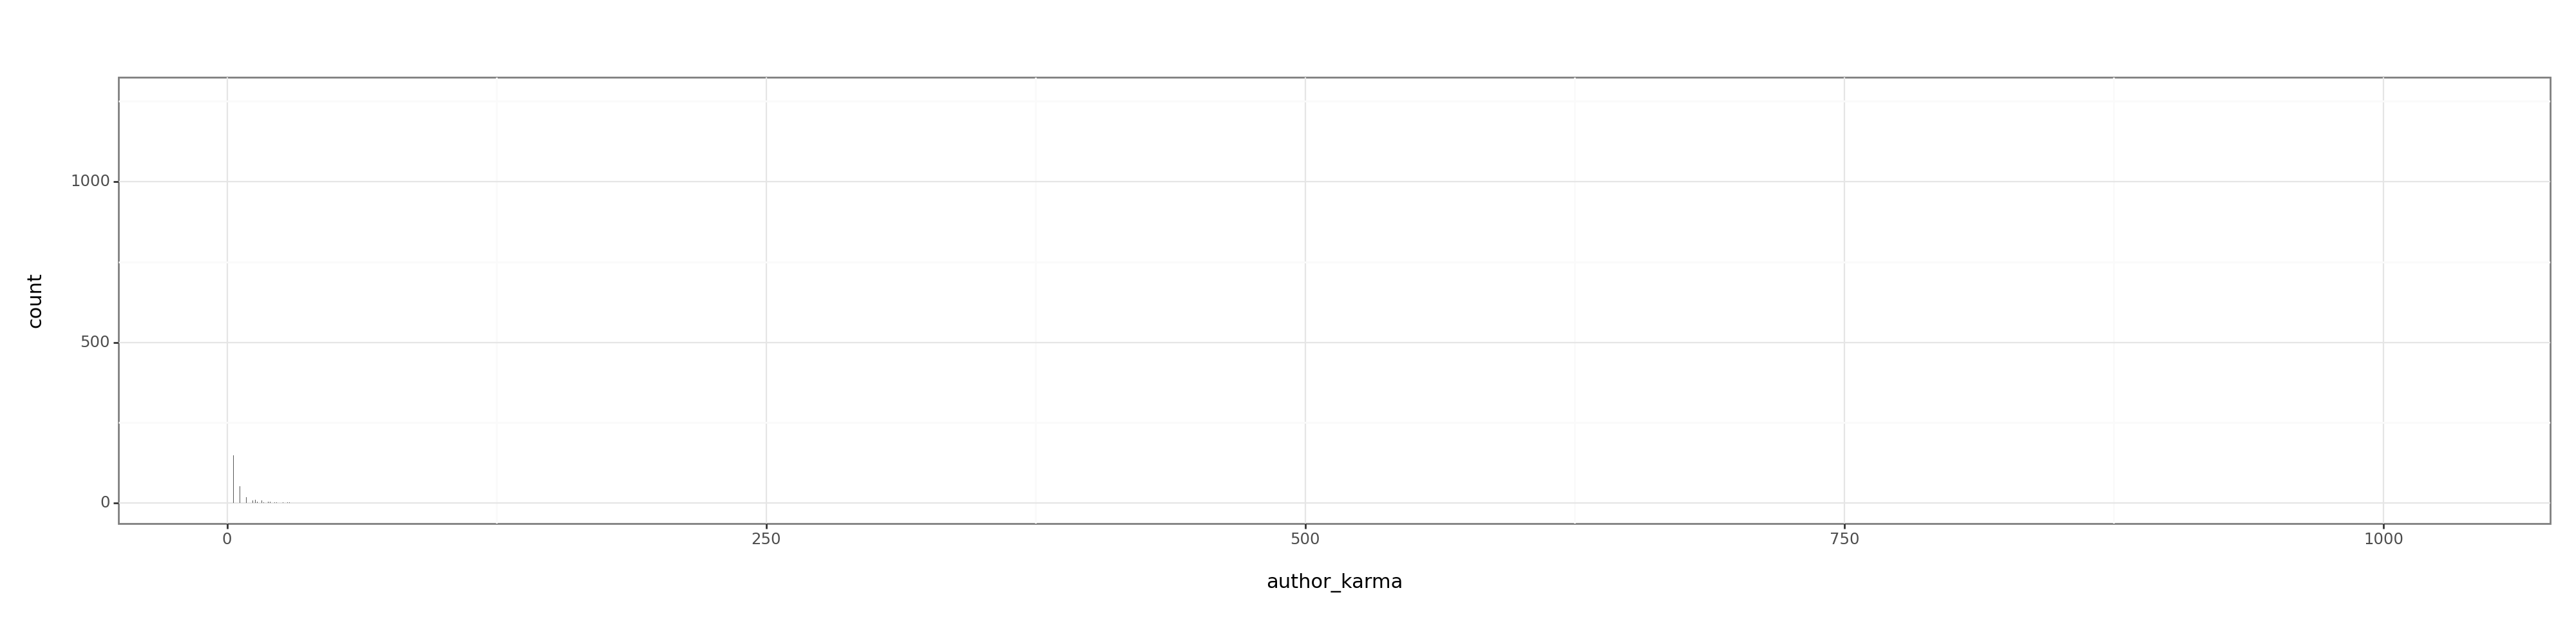

<Figure Size: (2000 x 500)>

In [15]:
p9.ggplot(karma_count,
  p9.aes(x = 'author_karma')
  ) + \
  p9.theme_bw() + \
  p9.geom_histogram() + \
  p9.theme(
    figure_size = (20, 5),
  )

In [24]:
df['karma_interval'] = pd.qcut(df['author_karma'].fillna(np.nan), 5, 
                              duplicates = 'drop', 
                              labels = ['Very low', 'Low', 'Medium', 'High', 'Very high'])
df['karma_interval']

0       Very high
1          Medium
2            High
3             NaN
4             Low
          ...    
9995         High
9996         High
9997          NaN
9998       Medium
9999       Medium
Name: karma_interval, Length: 10000, dtype: category
Categories (5, object): ['Very low' < 'Low' < 'Medium' < 'High' < 'Very high']

In [25]:
df.drop(['author_karma'], axis = 1, inplace = True)

### Downvotes span

In [26]:
df['downvotes'] = (round(df['upvotes'] / df['upvote_ratio']) - df['upvotes'])
df['downvotes'] = df['downvotes'].astype(int)
df.head()

,title,upvotes,score,upvote_ratio,edited,original,self,locked,comments,nsfw,...,spoiler,stickied,subreddit,subreddit_subs,url,category,post_year,post_month,karma_interval,downvotes
0,I’m depressed and anxious this Christmas,0,0,0.49,False,False,True,False,29,False,...,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/18qa...,Controversial,2023,12,Very high,0
1,Today i was at a neurologist and i told him th...,0,0,0.49,False,False,True,True,85,False,...,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/120x...,Controversial,2023,3,Medium,0
2,Do you watch porn?,3,3,0.54,False,False,True,False,22,False,...,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/1902...,Controversial,2024,1,High,3
3,Welp guess I’ll die a virgin,1,1,0.52,False,False,True,False,52,False,...,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/roks...,Controversial,2021,12,NaN,1
4,[Rant] So today I saw a guy in town dressed a ...,2,2,0.52,False,False,True,False,17,False,...,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/2kvv...,Controversial,2014,10,Low,2


In [27]:
min(df['downvotes'])

0

In [28]:
max(df['downvotes'])

1783

In [29]:
df.drop(['upvote_ratio', 'score'], axis = 1, inplace = True)

In [33]:
df['upvotes'].describe()

count    10000.000000
mean       305.424600
std       1050.769001
min          0.000000
25%          1.000000
50%          2.000000
75%         39.000000
max      27939.000000
Name: upvotes, dtype: float64

In [34]:
df['downvotes'].describe()

count    10000.000000
mean         4.617600
std         33.638301
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1783.000000
Name: downvotes, dtype: float64

In [35]:
df['comments'].describe()

count    10000.000000
mean        21.966200
std        191.356008
min          0.000000
25%          1.000000
50%          4.000000
75%         16.000000
max      18657.000000
Name: comments, dtype: float64

### Text Analysis

In [23]:
df['title_length'] = df['title'].apply(lambda t: len(t))
df.head()

,title,upvotes,edited,original,self,locked,comments,nsfw,self_text,spoiler,stickied,subreddit,subreddit_subs,url,category,post_year,post_month,karma_interval,downvotes,title_length
0,I’m depressed and anxious this Christmas,0,False,False,True,False,29,False,I’ve been struggling since my ex broke up with...,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/18qa...,Controversial,2023,12,Very high,0,40
1,Today i was at a neurologist and i told him th...,0,False,False,True,True,85,False,NaN,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/120x...,Controversial,2023,3,Medium,0,265
2,Do you watch porn?,3,False,False,True,False,22,False,Pornography is the worst factor that aggravate...,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/1902...,Controversial,2024,1,High,3,18
3,Welp guess I’ll die a virgin,1,False,False,True,False,52,False,\nLady who I thought was flirting well... she ...,False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/roks...,Controversial,2021,12,NaN,1,28
4,[Rant] So today I saw a guy in town dressed a ...,2,False,False,True,False,17,False,"So there I was walking through town, noticed s...",False,False,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/2kvv...,Controversial,2014,10,Low,2,60


In [24]:
df['text_length'] = df['self_text'].apply(lambda t: len(t) if not pd.isna(t) else 0)
df.head()

,title,upvotes,edited,original,self,locked,comments,nsfw,self_text,spoiler,...,subreddit,subreddit_subs,url,category,post_year,post_month,karma_interval,downvotes,title_length,text_length
0,I’m depressed and anxious this Christmas,0,False,False,True,False,29,False,I’ve been struggling since my ex broke up with...,False,...,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/18qa...,Controversial,2023,12,Very high,0,40,211
1,Today i was at a neurologist and i told him th...,0,False,False,True,True,85,False,NaN,False,...,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/120x...,Controversial,2023,3,Medium,0,265,0
2,Do you watch porn?,3,False,False,True,False,22,False,Pornography is the worst factor that aggravate...,False,...,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/1902...,Controversial,2024,1,High,3,18,220
3,Welp guess I’ll die a virgin,1,False,False,True,False,52,False,\nLady who I thought was flirting well... she ...,False,...,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/roks...,Controversial,2021,12,NaN,1,28,223
4,[Rant] So today I saw a guy in town dressed a ...,2,False,False,True,False,17,False,"So there I was walking through town, noticed s...",False,...,Anxiety,661128,https://www.reddit.com/r/Anxiety/comments/2kvv...,Controversial,2014,10,Low,2,60,828


In [25]:
# Source: https://github.com/cjhutto/vaderSentiment
analyzer = SentimentIntensityAnalyzer()
df['title_sentiment'] = df['title'].apply(lambda t: 'negative' if analyzer.polarity_scores(t)['compound'] <= -0.05
                                          else ('positive' if analyzer.polarity_scores(t)['compound'] >= 0.05
                                                else 'neutral'))
df.head()

,title,upvotes,edited,original,self,locked,comments,nsfw,self_text,spoiler,...,subreddit_subs,url,category,post_year,post_month,karma_interval,downvotes,title_length,text_length,title_sentiment
0,I’m depressed and anxious this Christmas,0,False,False,True,False,29,False,I’ve been struggling since my ex broke up with...,False,...,661128,https://www.reddit.com/r/Anxiety/comments/18qa...,Controversial,2023,12,Very high,0,40,211,negative
1,Today i was at a neurologist and i told him th...,0,False,False,True,True,85,False,NaN,False,...,661128,https://www.reddit.com/r/Anxiety/comments/120x...,Controversial,2023,3,Medium,0,265,0,negative
2,Do you watch porn?,3,False,False,True,False,22,False,Pornography is the worst factor that aggravate...,False,...,661128,https://www.reddit.com/r/Anxiety/comments/1902...,Controversial,2024,1,High,3,18,220,neutral
3,Welp guess I’ll die a virgin,1,False,False,True,False,52,False,\nLady who I thought was flirting well... she ...,False,...,661128,https://www.reddit.com/r/Anxiety/comments/roks...,Controversial,2021,12,NaN,1,28,223,negative
4,[Rant] So today I saw a guy in town dressed a ...,2,False,False,True,False,17,False,"So there I was walking through town, noticed s...",False,...,661128,https://www.reddit.com/r/Anxiety/comments/2kvv...,Controversial,2014,10,Low,2,60,828,negative


In [26]:
df['text_sentiment'] = df['self_text'].apply(lambda t: pd.NA if pd.isna(t) 
                                             else ('negative' if analyzer.polarity_scores(t)['compound'] <= -0.05
                                                      else ('positive' if analyzer.polarity_scores(t)['compound'] >= 0.05
                                                            else 'neutral')))
df.head()

,title,upvotes,edited,original,self,locked,comments,nsfw,self_text,spoiler,...,url,category,post_year,post_month,karma_interval,downvotes,title_length,text_length,title_sentiment,text_sentiment
0,I’m depressed and anxious this Christmas,0,False,False,True,False,29,False,I’ve been struggling since my ex broke up with...,False,...,https://www.reddit.com/r/Anxiety/comments/18qa...,Controversial,2023,12,Very high,0,40,211,negative,negative
1,Today i was at a neurologist and i told him th...,0,False,False,True,True,85,False,NaN,False,...,https://www.reddit.com/r/Anxiety/comments/120x...,Controversial,2023,3,Medium,0,265,0,negative,<NA>
2,Do you watch porn?,3,False,False,True,False,22,False,Pornography is the worst factor that aggravate...,False,...,https://www.reddit.com/r/Anxiety/comments/1902...,Controversial,2024,1,High,3,18,220,neutral,negative
3,Welp guess I’ll die a virgin,1,False,False,True,False,52,False,\nLady who I thought was flirting well... she ...,False,...,https://www.reddit.com/r/Anxiety/comments/roks...,Controversial,2021,12,NaN,1,28,223,negative,negative
4,[Rant] So today I saw a guy in town dressed a ...,2,False,False,True,False,17,False,"So there I was walking through town, noticed s...",False,...,https://www.reddit.com/r/Anxiety/comments/2kvv...,Controversial,2014,10,Low,2,60,828,negative,positive


### Content type

In [27]:
df['video'] = df['url'].str.contains('v.redd.it')

In [28]:
df['image'] = (df['url'].str.contains("gallery") | df['url'].str.contains("i.redd.it"))
df.head()

,title,upvotes,edited,original,self,locked,comments,nsfw,self_text,spoiler,...,post_year,post_month,karma_interval,downvotes,title_length,text_length,title_sentiment,text_sentiment,video,image
0,I’m depressed and anxious this Christmas,0,False,False,True,False,29,False,I’ve been struggling since my ex broke up with...,False,...,2023,12,Very high,0,40,211,negative,negative,False,False
1,Today i was at a neurologist and i told him th...,0,False,False,True,True,85,False,NaN,False,...,2023,3,Medium,0,265,0,negative,<NA>,False,False
2,Do you watch porn?,3,False,False,True,False,22,False,Pornography is the worst factor that aggravate...,False,...,2024,1,High,3,18,220,neutral,negative,False,False
3,Welp guess I’ll die a virgin,1,False,False,True,False,52,False,\nLady who I thought was flirting well... she ...,False,...,2021,12,NaN,1,28,223,negative,negative,False,False
4,[Rant] So today I saw a guy in town dressed a ...,2,False,False,True,False,17,False,"So there I was walking through town, noticed s...",False,...,2014,10,Low,2,60,828,negative,positive,False,False


In [29]:
df.drop(['url'], axis = 1, inplace = True)

In [30]:
df.to_csv('C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\src\\data\\Reddit_MentalHealth_ExtraFeatures.csv', index=False)

### Target class definition

In [2]:
df = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\src\\data\\Reddit_MentalHealth_ExtraFeatures.csv")
df.head()

,title,upvotes,edited,original,self,locked,comments,nsfw,self_text,spoiler,...,post_year,post_month,karma_interval,downvotes,title_length,text_length,title_sentiment,text_sentiment,video,image
0,I’m depressed and anxious this Christmas,0,False,False,True,False,29,False,I’ve been struggling since my ex broke up with...,False,...,2023,12,Very high,0,40,211,negative,negative,False,False
1,Today i was at a neurologist and i told him th...,0,False,False,True,True,85,False,NaN,False,...,2023,3,Medium,0,265,0,negative,NaN,False,False
2,Do you watch porn?,3,False,False,True,False,22,False,Pornography is the worst factor that aggravate...,False,...,2024,1,High,3,18,220,neutral,negative,False,False
3,Welp guess I’ll die a virgin,1,False,False,True,False,52,False,\nLady who I thought was flirting well... she ...,False,...,2021,12,NaN,1,28,223,negative,negative,False,False
4,[Rant] So today I saw a guy in town dressed a ...,2,False,False,True,False,17,False,"So there I was walking through town, noticed s...",False,...,2014,10,Low,2,60,828,negative,positive,False,False


In [3]:
# # Define thresholds for top 20%
upvote_threshold = df.groupby('subreddit')['upvotes'].quantile(0.8)
downvote_threshold = df.groupby('subreddit')['downvotes'].quantile(0.8)
comment_threshold = df.groupby('subreddit')['comments'].quantile(0.8)

In [4]:
df['upvote_popular'] = df.apply(lambda x: 1 if x['upvotes'] >= upvote_threshold[x['subreddit']] else 0, axis = 1)
df['downvote_popular'] = df.apply(lambda x: 1 if x['downvotes'] >= downvote_threshold[x['subreddit']] else 0, axis = 1)
df['comments_popular'] = df.apply(lambda x: 1 if x['comments'] >= comment_threshold[x['subreddit']] else 0, axis = 1)

In [5]:
df['upvote_popular'].value_counts()

0    7972
1    2028
Name: upvote_popular, dtype: int64

In [6]:
df['downvote_popular'].value_counts()

0    7354
1    2646
Name: downvote_popular, dtype: int64

In [7]:
df['comments_popular'].value_counts()

0    7970
1    2030
Name: comments_popular, dtype: int64

In [149]:
df.to_csv('C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\src\\data\\Reddit_MentalHealth_ExtraFeatures_w_Target.csv', index=False)

### Stratified split

In [150]:
df = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\src\\data\\Reddit_MentalHealth_ExtraFeatures_w_Target.csv")

In [151]:
df_shuffled = df.sample(frac = 1)

In [152]:
from sklearn.model_selection import train_test_split
train, temp_test = train_test_split(df, 
                                    stratify = df_shuffled[['upvote_popular', 'downvote_popular', 'comments_popular']], 
                                    test_size = 0.30, random_state = 15613)
val, test = train_test_split(temp_test, 
                             stratify = temp_test[['upvote_popular', 'downvote_popular', 'comments_popular']], 
                             test_size = 0.5, random_state = 15613)

In [153]:
train.to_csv('C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\train.csv', index=False)
val.to_csv('C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\val.csv', index=False)
test.to_csv('C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\test.csv', index=False)

### Correlation analysis

In [2]:
train = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\train.csv")
val = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\val.csv")
test = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\test.csv")

In [3]:
train_X = train.loc[:, ~train.columns.isin(['upvote_popular', 'downvote_popular', 'comments_popular'])]
train_y = train[['upvote_popular', 'downvote_popular', 'comments_popular']]
val_X = val.loc[:, ~val.columns.isin(['upvote_popular', 'downvote_popular', 'comments_popular'])]
val_y = val[['upvote_popular', 'downvote_popular', 'comments_popular']]
test_X = test.loc[:, ~test.columns.isin(['upvote_popular', 'downvote_popular', 'comments_popular'])]
test_y = test[['upvote_popular', 'downvote_popular', 'comments_popular']]

In [4]:
train_X_num = train_X.select_dtypes('number')
val_X_num = val_X.select_dtypes('number')
test_X_num = test_X.select_dtypes('number')

In [5]:
def correlation_analysis(data):
    # Source https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
    corr_threshold = 0.90
    corr_matrix = np.absolute(data.corr())
    corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

    cols_to_drop = []
    for col in corr_matrix_upper.columns:
        if any(corr_matrix_upper[col] > corr_threshold):
            cols_to_drop.append(col)
    
    return cols_to_drop

In [6]:
cols_to_drop = correlation_analysis(train_X_num)
train_X.drop(cols_to_drop, axis = 1, inplace = True)
val_X.drop(cols_to_drop, axis = 1, inplace = True)
test_X.drop(cols_to_drop, axis = 1, inplace = True)

C:\Users\joana\AppData\Local\Temp\ipykernel_16884\2423915936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\joana\AppData\Local\Temp\ipykernel_16884\2423915936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\joana\AppData\Local\Temp\ipykernel_16884\2423915936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### NaN replacement

In [2]:
train = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\train.csv")
val = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\val.csv")
test = pd.read_csv(r"C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\data\\test.csv")

In [4]:
# Replace NaNs with mode
mode_text_sentiment = train['text_sentiment'].mode().loc[0]
train['text_sentiment'] = train['text_sentiment'].apply(
    lambda x : x if isinstance(x, str) else mode_text_sentiment)
val['text_sentiment'] = val['text_sentiment'].apply(
    lambda x : x if isinstance(x, str) else mode_text_sentiment)
test['text_sentiment'] = test['text_sentiment'].apply(
    lambda x : x if isinstance(x, str) else mode_text_sentiment)

mode_karma_interval = train['karma_interval'].mode().loc[0]
train['karma_interval'] = train['karma_interval'].apply(
    lambda x : x if isinstance(x, str) else mode_karma_interval)
val['karma_interval'] = val['karma_interval'].apply(
    lambda x : x if isinstance(x, str) else mode_karma_interval)
test['karma_interval'] = test['karma_interval'].apply(
    lambda x : x if isinstance(x, str) else mode_karma_interval)


In [5]:
train.to_csv('C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\src\\data\\train.csv', index=False)
val.to_csv('C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\src\\data\\val.csv', index=False)
test.to_csv('C:\\Users\\joana\\Documents\\GitHub\\CSCI6405\\src\\data\\test.csv', index=False)